In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['iris.data.csv']


In [2]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z
    
    def sigmoid(self, X): 
        a=np.exp(-self.net_input(X))
        return (1/(1+a))
        
    def tanh(self, X):    
        a=np.exp(-self.net_input(X))
        b=np.exp(self.net_input(X))
        return ((b-a)/(b+a))
    
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.tanh(X) >= 0.0, 1, -1)

In [3]:
import pandas as pd

df = pd.read_csv('../input/iris.data.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


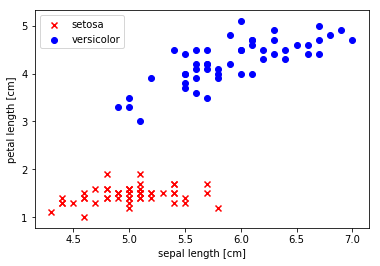

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='o', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

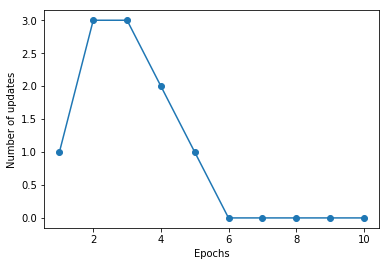

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [6]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

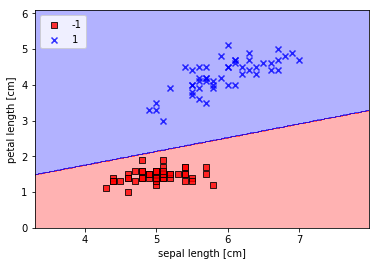

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [8]:
ppn=Perceptron(0.01,50,1)

In [9]:
ppn.fit(X,y)

In [10]:
ppn.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [11]:
ppn.net_input(X)

array([-0.13395053, -0.11992702, -0.12357533, -0.08121992, -0.12693877,
       -0.10197031, -0.09889175, -0.10926694, -0.08486823, -0.10225519,
       -0.13731397, -0.0775716 , -0.11291526, -0.13087196, -0.21837648,
       -0.15834924, -0.17265763, -0.13395053, -0.12300558, -0.1162787 ,
       -0.10197031, -0.1162787 , -0.16957906, -0.08093504, -0.02455612,
       -0.09159512, -0.09159512, -0.12329046, -0.14096228, -0.07055985,
       -0.0775716 , -0.13731397, -0.12329046, -0.16199755, -0.10225519,
       -0.16228243, -0.17966938, -0.10225519, -0.10254006, -0.1162787 ,
       -0.1446106 , -0.10955182, -0.10254006, -0.09159512, -0.04559139,
       -0.11291526, -0.09860687, -0.09889175, -0.13030221, -0.12693877,
        0.31599643,  0.32272331,  0.35835185,  0.29746998,  0.33338339,
        0.37180561,  0.36507873,  0.21583772,  0.32637163,  0.30083342,
        0.24416962,  0.30476661,  0.2624112 ,  0.37910224,  0.21977091,
        0.28401622,  0.37881737,  0.29410654,  0.33674683,  0.27

In [12]:
ppn.sigmoid(X)

array([0.46656235, 0.47005413, 0.46914542, 0.47970618, 0.46830785,
       0.47452949, 0.47529719, 0.47271041, 0.47879567, 0.47445845,
       0.46572535, 0.48061682, 0.47180114, 0.46732863, 0.44562181,
       0.4604952 , 0.4569425 , 0.46656235, 0.46928732, 0.47096303,
       0.47452949, 0.47096303, 0.45770654, 0.47977728, 0.49386128,
       0.47711722, 0.47711722, 0.46921637, 0.46481767, 0.48236735,
       0.48061682, 0.46572535, 0.46921637, 0.45958895, 0.47445845,
       0.4595182 , 0.4552031 , 0.47445845, 0.47438742, 0.47096303,
       0.46391022, 0.4726394 , 0.47438742, 0.47711722, 0.48860413,
       0.47180114, 0.47536824, 0.47529719, 0.46747046, 0.46830785,
       0.57834824, 0.5799878 , 0.5886414 , 0.57382392, 0.58258238,
       0.59189521, 0.59026929, 0.55375092, 0.58087628, 0.57464624,
       0.56074093, 0.57560734, 0.56522893, 0.59365656, 0.55472265,
       0.57053058, 0.59358783, 0.57300118, 0.58340007, 0.56777683,
       0.60127911, 0.56350504, 0.59878914, 0.59365656, 0.57135

In [13]:
ppn.tanh(X)

array([-0.13315509, -0.11935535, -0.12295012, -0.08104179, -0.12626133,
       -0.10161835, -0.09857063, -0.10883415, -0.08466506, -0.10190027,
       -0.1364574 , -0.07741638, -0.11243781, -0.13012988, -0.21497011,
       -0.15703887, -0.17096216, -0.13315509, -0.12238894, -0.11575746,
       -0.10161835, -0.11575746, -0.16797201, -0.08075878, -0.02455118,
       -0.09133982, -0.09133982, -0.12266954, -0.14003599, -0.07044298,
       -0.07741638, -0.1364574 , -0.12266954, -0.16059516, -0.10190027,
       -0.16087268, -0.17776072, -0.10190027, -0.10218218, -0.11575746,
       -0.14361092, -0.10911565, -0.10218218, -0.09133982, -0.04555982,
       -0.11243781, -0.09828851, -0.09857063, -0.12956973, -0.12626133,
        0.3058824 ,  0.31196728,  0.34376147,  0.2889956 ,  0.32155762,
        0.35557005,  0.34967965,  0.21254736,  0.31525677,  0.29207512,
        0.23943025,  0.29566863,  0.25654942,  0.36192756,  0.2162997 ,
        0.27661809,  0.36167998,  0.28591008,  0.32457001,  0.26